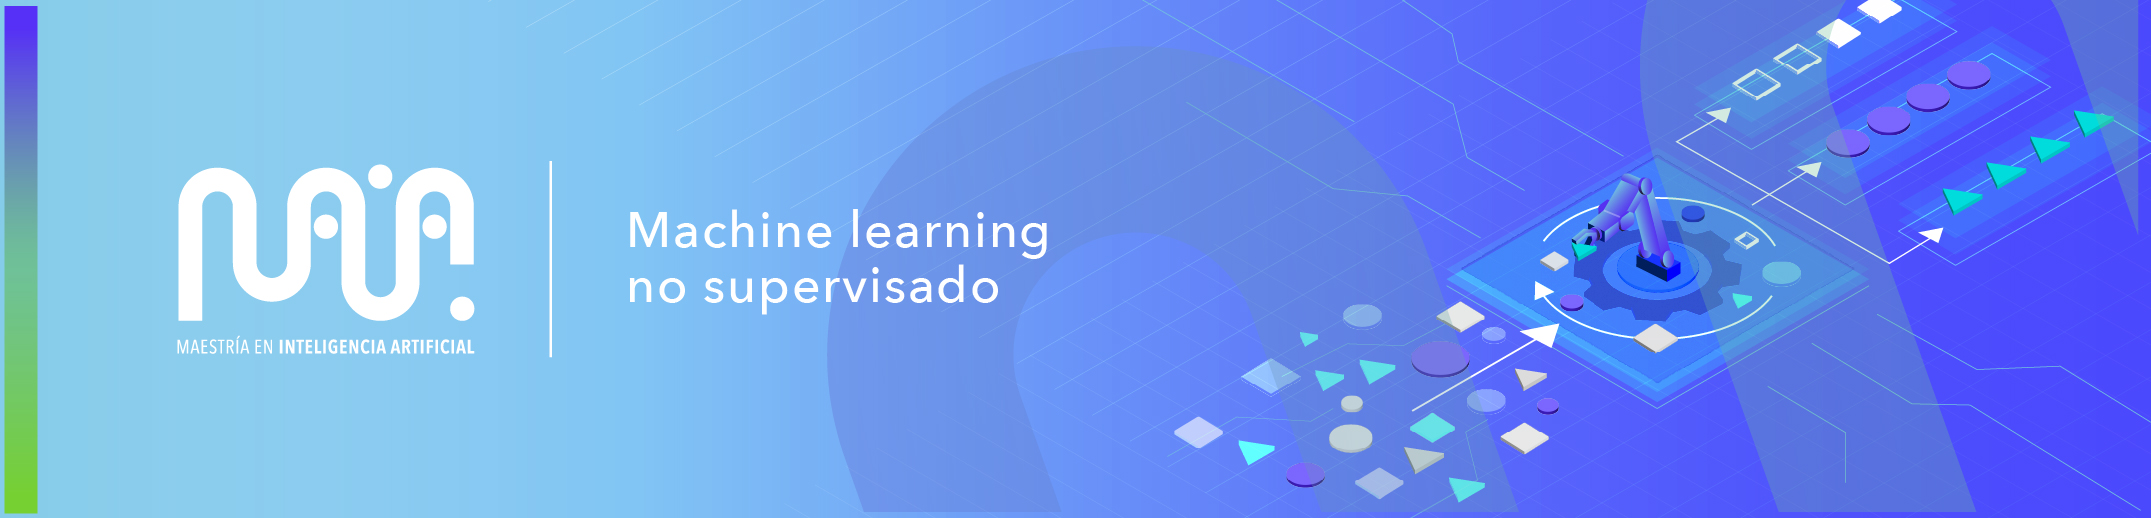

# Solución de problemas con el algoritmo aglomerativo

En este tutorial aprenderás cómo crear un modelo de agrupación haciendo uso del algoritmo jerárquico aglomerativo. En ese sentido, realizarás una selección del hiperparámetro _k_ mediante el método de la silueta y, además, visualizarás la jerarquía y generación de los clústeres mediante el dendrograma. En este sentido, veremos cómo realizar los siguientes procesos:

1. [Importar las librerías necesarias.](#1.-Importación-de-librerías-requeridas)
2. [Cargar un conjunto de datos procesado.](#2.-Carga-de-datos)
3. [Seleccionar el hiperparámetro K mediante el método de la silueta.](#3.-Selección-del-hiperparámetro-K)
4. [Generar el dendrograma.](#4.-Generación-del-dendrograma)
5. [Interpretar los grupos resultantes del mejor modelo.](#5.-Interpretación-de-los-grupos-resultantes-del-mejor-modelo)

---

<font size="3">**Contexto**  
<font size="2"> El conjunto de datos que utilizaremos se relaciona con la caracterización de vinos con base en atributos como el pH, la cantidad de dióxido de azufre, azúcar residual, entre otros. Este conocimiento puede resultar muy útil en la certificación de la calidad de una muestra de vino a partir de variables fisicoquímicas. Los datos han sido descargados a partir de este [enlace](https://archive.ics.uci.edu/dataset/186/wine+quality) y modificados para propósitos de este ejercicio. Es un caso ideal que permitirá ejemplificar todo el proceso.  
Cita: Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## 1. Importación de librerías requeridas

Importaremos las librerías `pandas`, `numpy`, `scikit-learn` y `matplotlib`, así como la librería `scipy` para generar el dendrograma. Usaremos las siguientes clases y funciones para ejecutar el algoritmo aglomerativo:

* [`AgglomerativeClustering()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html): clase para ejecutar el algoritmo aglomerativo.
* [`dendrogram()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html): función para graficar el agrupamiento jerárquico como un dendrograma o diagrama de árbol.
* [`linkage()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html): función para ejecutar el algoritmo aglomerativo con la librería `scipy`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 2. Carga de datos

Realizaremos la carga de datos ya procesados usando la función de Pandas `read_csv()`, especificando la ruta y el separador del archivo:

In [2]:
data = pd.read_csv('data/wine_quality_processed.csv', sep=',')

Veamos los primeros datos del conjunto utilizando `head()`:

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.014686,-0.598414,0.687864,0.647556,-0.490277,-0.481295,-1.087387,-0.860845,1.023142,-1.216361,-0.204441
1,0.116950,-0.429483,0.489375,0.679115,-0.788505,-0.483734,-1.094311,-1.029712,1.386693,-0.791893,-0.234492
2,-0.136908,0.224380,1.273631,0.890364,-1.134886,-0.175259,0.759525,1.811517,-0.956226,-0.342054,0.377655
3,1.140204,0.623189,-1.306935,-0.696380,1.018252,1.564610,0.786791,-0.411051,-0.632910,1.301869,-0.044845
4,0.086776,-0.860876,0.688661,0.950283,-0.847040,-0.608213,-1.104763,-0.805384,1.672159,-1.114566,-0.189747


Al igual que con KMeans y KMedoides, el algoritmo aglomerativo también utiliza métricas de distancia. Este último inicia con un número de clústeres igual al número de datos, combinando las parejas de clústeres más similares de acuerdo con criterios de unión.

## 3. Selección del hiperparámetro K

Una de las ventajas de utilizar la clase `AgglomerativeClustering()` es que podemos definir el número de clústeres explícitamente, "podando" el árbol jerárquico hasta llegar a él. Esto, a su vez, nos permite utilizar el método de la silueta para seleccionar el mejor valor del hiperparámetro _k_.

### Método de la silueta

Como ya has visto en tutoriales anteriores, valores cercanos a 1 indican que un dato está lejos de los demás clústeres, mientras que valores cercanos a -1 indican que un dato está más cerca a otro clúster que al que fue asignado.

Definiremos la función `silhouette_plot()`, que ejecuta el algoritmo aglomerativo y calcula el coeficiente promedio. Incluiremos el parámetro `linkage`, que define el criterio de unión entre clústeres. Los valores válidos para este hiperparámetro son `{'ward', 'complete', 'average', 'single'}`, aunque dejaremos por defecto el criterio `ward`:

In [4]:
def silhouette_plot(X, k_min=2, k_max=5, linkage='ward'):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    linkage : str
        Criterio de unión. Parámetro de AgglomerativeClustering()
    """
    scores = []
    for i in range(k_min, k_max+1):
        model_k = AgglomerativeClustering(n_clusters=i, linkage=linkage)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

Veremos el comportamiento del coeficiente para nuestro conjunto de datos:

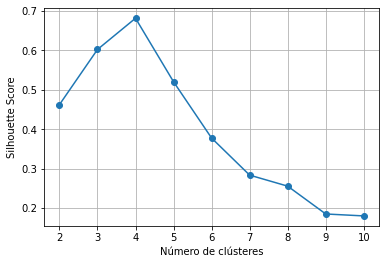

In [5]:
silhouette_plot(data, 2, 10)

Como puedes observar, el algoritmo aglomerativo retorna un valor máximo para el coeficiente de la silueta con 4 clústeres. Para obtener una descripción más detallada del coeficiente de la silueta para cada escenario, definiremos la función `silhouette_analysis()`:

In [6]:
def silhouette_analysis(X, k_min=2, k_max=5, linkage='ward'):
    """
    Genera gráficas con el coeficiente de la silueta para cada clúster y cada ejemplo
    
    Parametros:
    X : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    linkage : str
        Criterio de unión. Parámetro de AgglomerativeClustering()
    """
    for n_clusters in range(k_min, k_max+1):
        clusterer = AgglomerativeClustering(n_clusters, linkage=linkage)
        
        # Entrenamos el modelo
        cluster_labels = clusterer.fit_predict(X)
        # Obtenemos el coeficiente promedio
        silhouette_avg = silhouette_score(X, cluster_labels)
        # Obtenemos el coeficiente para cada ejemplo
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        
        # Inicializamos una figura
        fig = plt.figure(figsize = (18, 7))
        plt.xlim([-0.2, 1])
        plt.ylim([0, len(X) + (n_clusters + 1) * 10])
        
        y_lower = 10
        for i in range(n_clusters):
            # Obtenemos los valores del coeficiente para cada cluster
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            # Ordenamos los valores de mayor a menor
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            plt.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.title(f"Método de la silueta (k={n_clusters})")
        plt.xlabel("Coeficiente")
        plt.ylabel("Clúster")
        
        # Incluimos el valor promedio
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")
        plt.yticks([])
        plt.xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

Realizaremos el análisis específico para los primeros cuatro valores de _k_:

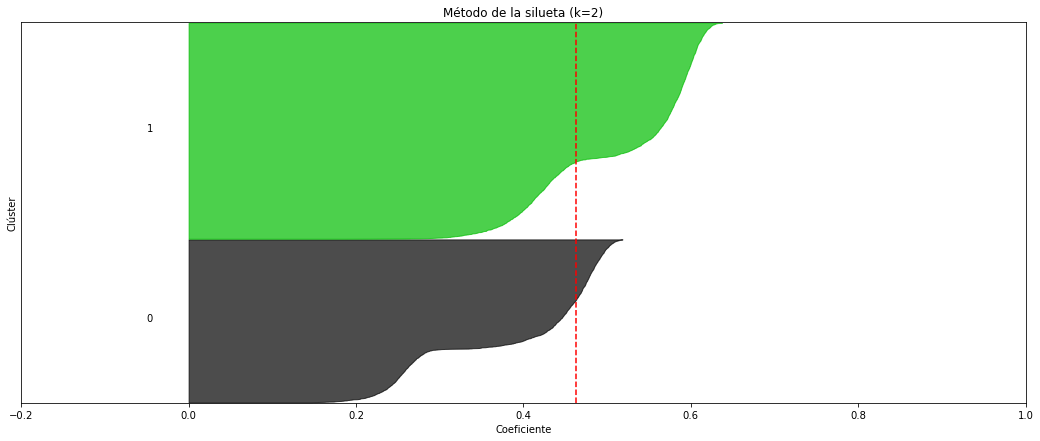

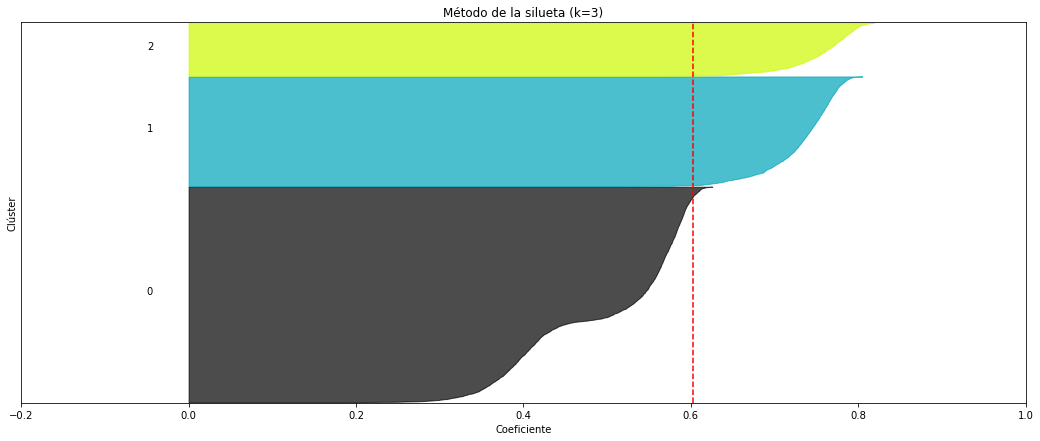

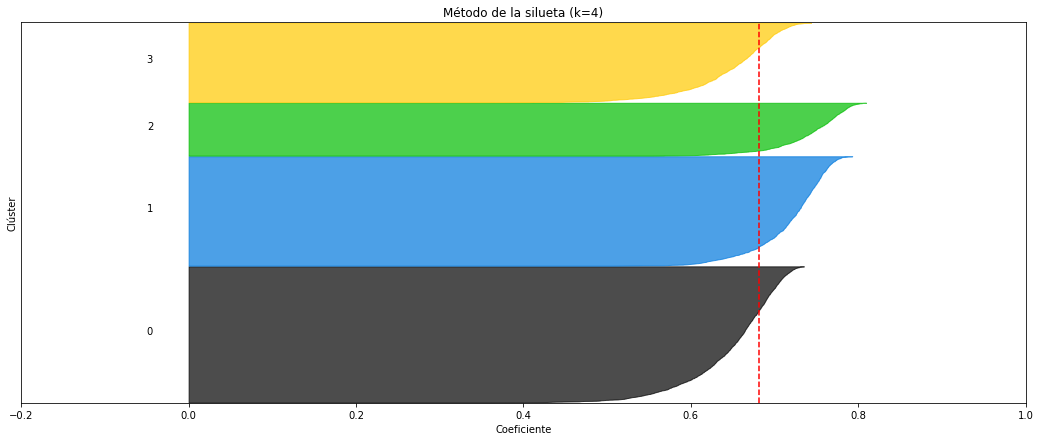

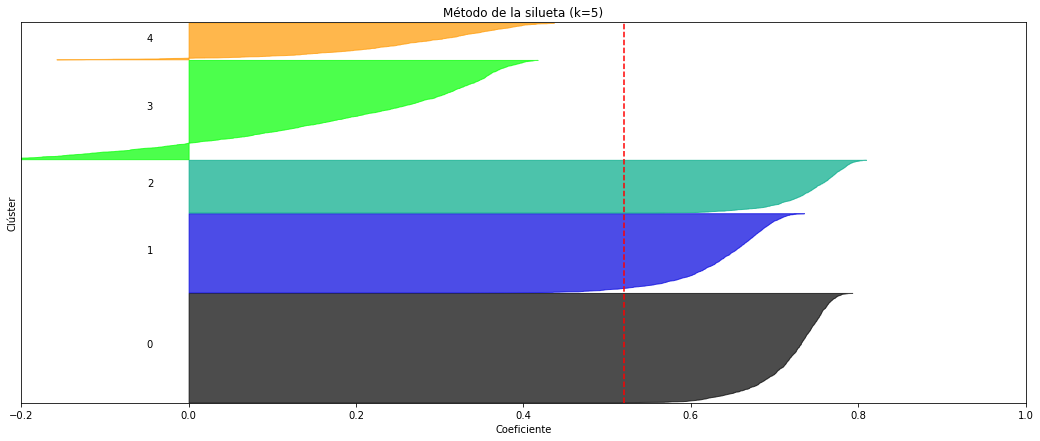

In [7]:
silhouette_analysis(data, 2, 5)

Como puedes observar, en `k=4` tenemos valores positivos superiores a 0.4 para todos los ejemplos de nuestro conjunto. Incluso, en `k=5` ya se empiezan a ver valores negativos para algunos clústeres, lo que indica que no están siendo asignados correctamente.

## 4. Generación del dendrograma

El dendrograma, o diagrama de árbol, nos permite visualizar la jerarquía de las uniones realizadas por el algoritmo aglomerativo en función de la distancia. Ten en cuenta que, al usar `linkage=ward`, estamos utilizando la distancia euclidiana para realizar las comparaciones entre parejas de clústeres. Primero usaremos la función `linkage()` para aplicar el algoritmo aglomerativo a nuestro conjunto de datos:

In [8]:
data_lnk = linkage(data, 'ward', 'euclidean')
data_lnk

array([[6.47000000e+02, 5.55600000e+03, 1.57962212e-01, 2.00000000e+00],
       [8.39000000e+02, 4.08000000e+03, 1.84531841e-01, 2.00000000e+00],
       [9.91000000e+02, 2.96700000e+03, 1.91526161e-01, 2.00000000e+00],
       ...,
       [1.29870000e+04, 1.29890000e+04, 1.60293063e+02, 3.70300000e+03],
       [1.29850000e+04, 1.29880000e+04, 2.04872316e+02, 2.79400000e+03],
       [1.29900000e+04, 1.29910000e+04, 2.44597140e+02, 6.49700000e+03]])

El resultado de aplicar la función `linkage()` es una matriz de uniones, donde cada fila representa una fusión de dos clústeres (en total N-1, hasta llegar a un único clúster). Se tienen cuatro columnas, las dos primeras muestran los índices de los ejemplos tomados para aplicar el criterio de unión, la tercera muestra la distancia entre ellos, y la última muestra el número de ejemplos en el clúster resultante:

In [9]:
pd.DataFrame(data_lnk, columns=['Índice 1', 'Índice 2', 'Distancia', '# Ejemplos en clúster'])

,Índice 1,Índice 2,Distancia,# Ejemplos en clúster
0,647.0,5556.0,0.157962,2.0
1,839.0,4080.0,0.184532,2.0
2,991.0,2967.0,0.191526,2.0
3,2562.0,6411.0,0.208076,2.0
4,4070.0,5767.0,0.217690,2.0
...,...,...,...,...
6491,12979.0,12983.0,34.987858,1884.0
6492,12978.0,12986.0,35.553993,2339.0
6493,12987.0,12989.0,160.293063,3703.0
6494,12985.0,12988.0,204.872316,2794.0


Podemos utilizar este resultado como entrada de la función `dendrogram()`, que generará una gráfica con el diagrama de árbol para nuestro conjunto de datos:

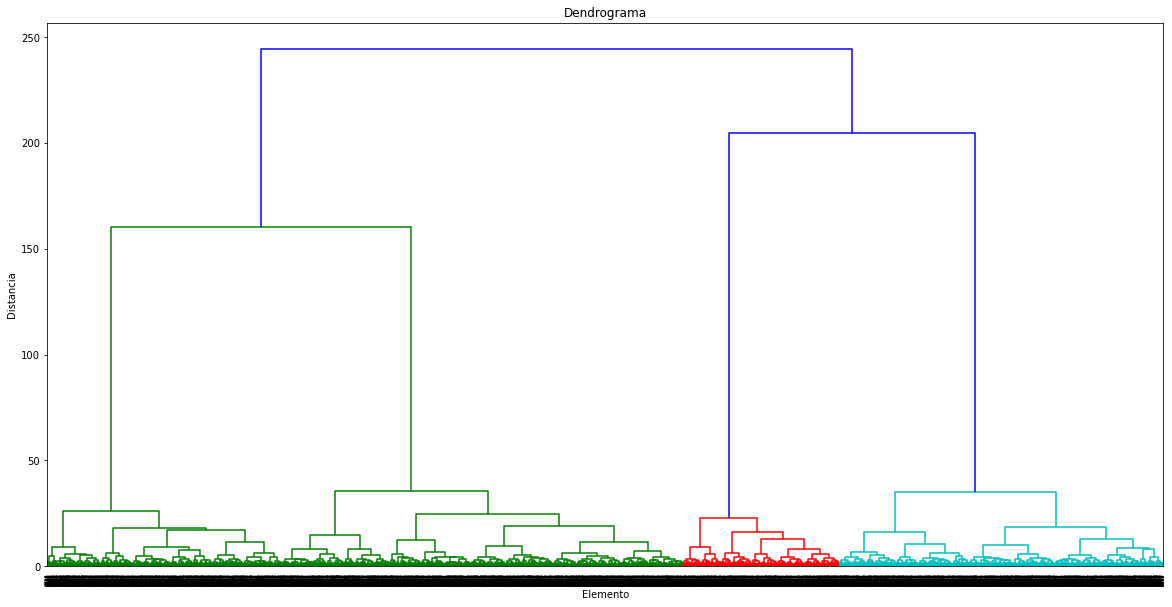

In [10]:
plt.figure(figsize=(20, 10))
dendrogram(data_lnk)
plt.title('Dendrograma')
plt.xlabel('Elemento')
plt.ylabel('Distancia')
plt.show()

Como puedes observar, se inicia con N clústeres y se agrega un nodo padre para representar cada unión entre parejas. El eje _y_ nos muestra la distancia entre clústeres, por lo que lineas más largas representan uniones realizadas con clústeres más separados. Específicamente para nuestro conjunto de datos, hay una gran distancia al pasar de cuatro clústeres a dos, por lo que tiene sentido que el mejor valor de _k_ sea 4. Por otra parte, la línea horizontal más larga que no corta una línea horizontal nos indica que efectivamente el número óptimo de grupos es 4.

## 5. Interpretación de los grupos resultantes del mejor modelo

Con el análisis del método de la silueta, así como el dendrograma, podemos afirmar que el mejor valor de _k_ es 4. Empezaremos definiendo un objeto de la clase `AgglomerativeClustering()` con cuatro clústeres:

In [11]:
mejor_modelo = AgglomerativeClustering(n_clusters=4)
mejor_modelo.fit(data)

AgglomerativeClustering(n_clusters=4)

El criterio de unión `ward` minimiza la varianza entre todos los clústeres, por lo que tiende a generar clústeres de tamaños similares:

([<matplotlib.axis.XTick at 0x7f49cacad3d0>,
 <a list of 4 Text major ticklabel objects>)

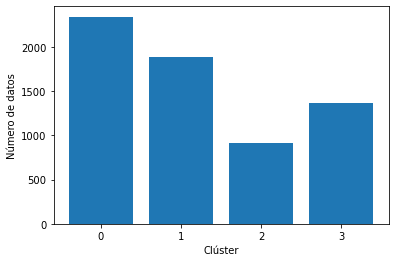

In [12]:
labels = mejor_modelo.labels_
indexes, values = np.unique(labels, return_counts=True)

rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)

## Cierre

En este tutorial hemos utilizado la clase `AgglomerativeClustering()` para aplicar el algoritmo jerárquico aglomerativo a nuestro conjunto de datos. Específicamente, utilizamos el método de la silueta para encontrar el mejor valor del hiperparámetro _k_, y realizamos un análisis de la agrupación mediante el dendrograma.

<font size="3">**Hands-on**  
    
* Utilizando diagranas de caja, realiza una interpretación de los grupos obtenidos con base en las varoables que consideres más improtantes. 

* El parámetro `linkage` permite seleccionar otros criterios de unión entre parejas de clústeres. ¿Cómo se comporta el algoritmo con otro criterio de unión?

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Noviembre 23, 2023*  
*Universidad de los Andes*   